<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-toro-sal/blob/main/Actividad%20Semanal%206visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# 1.Descarga los datos Enlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí

In [ ]:
path='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(path)


# 2.Descripción aquí. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [ ]:
df.isna

<bound method DataFrame.isna of           ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16     

# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [ ]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [ ]:
df.X5.fillna(df.X5.mean(), inplace=True)
df.dropna(inplace = True)


# 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [ ]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,...,29961.000000,29961.000000,29961.000000,29961.000000,2.996100e+04,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000
mean,15004.069457,167570.831414,1.604052,1.853042,1.551784,35.483444,-0.017156,-0.134041,-0.166783,-0.221121,...,43279.742465,40329.126631,38888.917025,5666.635693,5.926206e+03,5228.981109,4830.090851,4802.842629,5220.932879,0.221154
std,8655.379653,129747.726791,0.489062,0.790463,0.522009,9.213857,1.123947,1.197122,1.195977,1.168370,...,64363.745973,60825.064775,59580.737846,16572.172269,2.305530e+04,17617.072002,15675.706098,15287.267034,17788.331077,0.415031
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7514.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.000000,1762.000000,1256.000000,1000.000000,8.350000e+02,390.000000,296.000000,253.000000,118.000000,0.000000
50%,15004.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19038.000000,18104.000000,17067.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54558.000000,50222.000000,49235.000000,5007.000000,5.000000e+03,4512.000000,4015.000000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


# 5.Realiza el conteo de las variables categóricas

In [ ]:
df.value_counts(['X2'])

X2 
2.0    18098
1.0    11863
dtype: int64

In [ ]:
df.value_counts(['X3'])

X3 
2.0    14010
1.0    10574
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
dtype: int64

In [ ]:
df.value_counts(['X4'])

X4 
2.0    15940
1.0    13644
3.0      323
0.0       54
dtype: int64

In [ ]:
df.value_counts(['X6'])

X6  
 0.0    14719
-1.0     5681
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
dtype: int64

In [ ]:
df.value_counts(['X7'])

X7  
 0.0    15711
-1.0     6043
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
dtype: int64

In [ ]:
df.value_counts(['X8'])

X8  
 0.0    15744
-1.0     5931
-2.0     4082
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
dtype: int64

In [ ]:
df.value_counts(['X9'])


X9  
 0.0    16433
-1.0     5682
-2.0     4343
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
dtype: int64

In [ ]:
df.value_counts(['X10'])

X10 
 0.0    16927
-1.0     5533
-2.0     4542
 2.0     2618
 3.0      178
 4.0       84
 7.0       57
 5.0       17
 6.0        4
 8.0        1
dtype: int64

In [ ]:
df.value_counts(['X11'])

X11 
 0.0    16268
-1.0     5731
-2.0     4891
 2.0     2760
 3.0      183
 4.0       49
 7.0       46
 6.0       18
 5.0       13
 8.0        2
dtype: int64

In [ ]:
df.value_counts(['Y'])

Y  
0.0    23335
1.0     6626
dtype: int64

# 6.Escala los datos, si consideras necesario

In [ ]:
scaler = StandardScaler()
normalized = scaler.fit_transform(df)
df_norm = pd.DataFrame(normalized, columns=df.columns)
df_norm

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.733410,-1.137386,0.809621,0.185917,-1.057057,-1.246344,1.794737,1.782673,-0.696695,-0.666648,...,-0.672435,-0.663046,-0.652720,-0.341943,-0.227162,-0.296818,-0.308131,-0.314178,-0.293508,1.876628
1,-1.733294,-0.366647,0.809621,0.185917,0.858651,-1.029276,-0.874472,1.782673,0.139456,0.189259,...,-0.621599,-0.606243,-0.597987,-0.341943,-0.213673,-0.240054,-0.244337,-0.314178,-0.181073,1.876628
2,-1.733179,-0.597869,0.809621,0.185917,0.858651,-0.161004,0.015264,0.111971,0.139456,0.189259,...,-0.449775,-0.417288,-0.391742,-0.250342,-0.191985,-0.240054,-0.244337,-0.248763,-0.012420,-0.532871
3,-1.733063,-0.906165,0.809621,0.185917,-1.057057,0.164598,0.015264,0.111971,0.139456,0.189259,...,-0.232522,-0.186935,-0.156797,-0.221256,-0.169474,-0.228701,-0.237958,-0.244249,-0.237291,-0.532871
4,-1.732948,-0.906165,-1.235145,0.185917,-1.057057,2.335278,-0.874472,0.111971,-0.696695,0.189259,...,-0.347092,-0.348269,-0.331621,-0.221256,1.333980,0.270822,0.266015,-0.269107,-0.255336,-0.532871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29956,1.732123,0.404092,-1.235145,1.451020,-1.057057,0.381666,0.015264,0.111971,0.139456,0.189259,...,0.694879,-0.149482,-0.384508,0.170974,0.610447,-0.012828,-0.113751,0.012897,-0.237291,-0.532871
29957,1.732238,-0.135425,-1.235145,1.451020,0.858651,0.815802,-0.874472,-0.723380,-0.696695,-0.666648,...,-0.532929,-0.577718,-0.652720,-0.231092,-0.104108,0.213945,-0.299902,-0.314178,-0.293508,-0.532871
29958,1.732354,-1.060312,-1.235145,0.185917,0.858651,0.164598,3.574210,2.618024,1.811758,-0.666648,...,-0.348055,-0.324660,-0.327828,-0.341943,-0.257047,0.951991,-0.040196,-0.183348,-0.119234,1.876628
29959,1.732469,-0.674943,-1.235145,1.451020,-1.057057,0.598734,0.905000,-0.723380,0.139456,0.189259,...,0.147512,-0.468139,0.168767,4.841532,-0.109183,-0.229950,-0.185264,3.150462,-0.192092,1.876628


# 7. Reduce las dimensiones con PCA, si consideras necesario. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70% Indica la importancia de las variables en cada componente

In [ ]:
ndf = df_norm[['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']]
pcs = PCA(n_components=14)

pcs.fit(ndf[['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary
pcsSummary1 = pcsSummary.transpose()
pcsSummary1.round(4)
pcsSummary1.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','PC13', 'PC14']
pcsSummary1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.432957,1.310005,1.022245,0.961779,0.940055,0.934203,0.882949,0.852433,0.840994,0.514242,0.266499,0.202647,0.159195,0.152459
Proportion of variance,0.422792,0.122575,0.074639,0.066071,0.063120,0.062336,0.055684,0.051901,0.050518,0.018888,0.005073,0.002933,0.001810,0.001660
Cumulative proportion,0.422792,0.545367,0.620006,0.686077,0.749196,0.811533,0.867216,0.919118,0.969635,0.988524,0.993596,0.996530,0.998340,1.000000


In [ ]:
pcsSummary1.iloc[2,4]

0.7491964699605809

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),columns=pcsSummary1.columns,
                                index=ndf.iloc[:,:].columns
                                )
pcsComponents_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165522,0.300782,-0.378350,-0.200527,0.034696,-0.078372,0.111243,-0.049369,-0.821868,-0.029175,-0.006145,0.015718,-0.000441,0.003344
X5,0.032787,0.071858,-0.869702,0.338702,-0.039097,0.070979,-0.078796,0.028591,0.330127,-0.009017,0.000129,-0.001380,0.000137,0.001067
X12,0.372426,-0.190870,-0.034183,-0.064039,0.041161,-0.044041,0.008174,0.009448,0.010290,0.566731,0.415924,-0.433046,-0.183839,-0.316545
X13,0.383243,-0.174657,-0.001853,0.007370,0.083063,-0.028996,-0.032340,-0.135664,0.017387,0.386865,0.038416,0.344950,0.329662,0.645182
X14,0.388256,-0.126913,0.034706,0.060509,0.114167,0.098819,-0.121294,0.092835,-0.018943,0.122842,-0.484649,0.495927,-0.086506,-0.527631
X15,0.391550,-0.120406,0.034038,0.074801,0.028588,0.014358,0.126436,0.039227,0.018909,-0.205285,-0.523241,-0.489417,-0.362301,0.346145
X16,0.388498,-0.105950,0.033869,0.039638,-0.106943,-0.099053,-0.007607,0.049752,0.023434,-0.420011,0.068140,-0.249725,0.718303,-0.226759
X17,0.380660,-0.094216,0.018531,-0.070255,-0.164916,0.069785,0.007955,0.000137,0.058760,-0.488829,0.513516,0.338689,-0.427507,0.072341
X18,0.135164,0.383274,0.173490,0.361363,0.226137,0.039815,-0.201097,-0.749008,0.022982,-0.056548,0.047619,-0.069337,-0.044925,-0.084583
X19,0.116790,0.408294,0.200803,0.346457,0.150515,0.407194,-0.279520,0.577801,-0.112781,0.050850,0.147266,-0.068902,0.038965,0.124890


#8. Elabora los histogramas de los atributos para visualizar su distribución

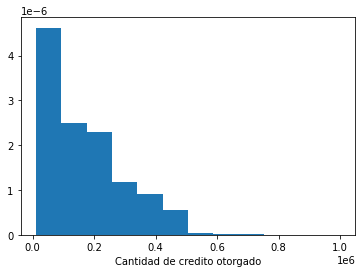

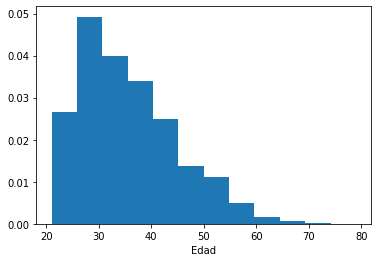

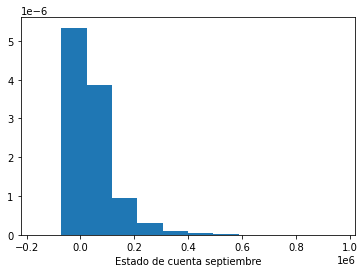

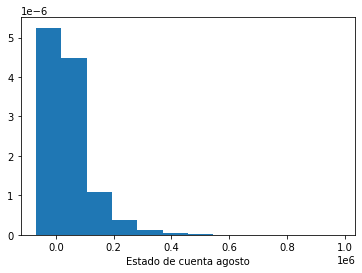

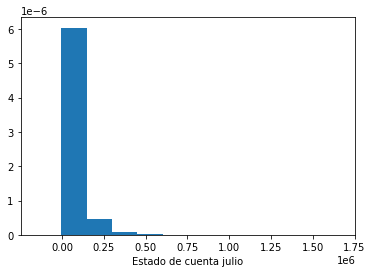

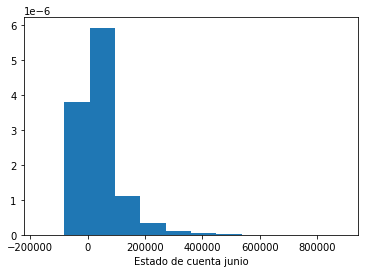

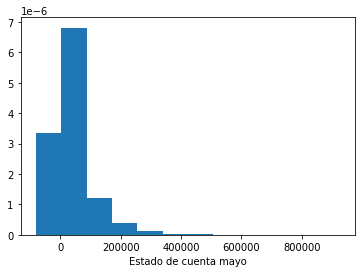

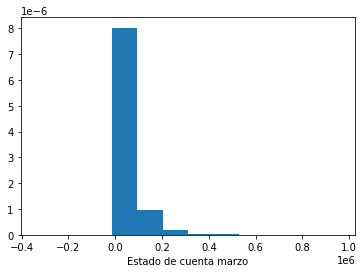

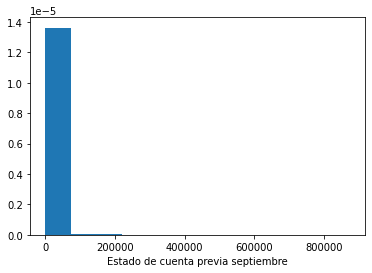

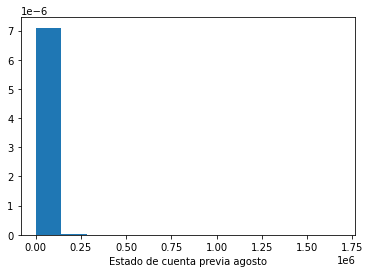

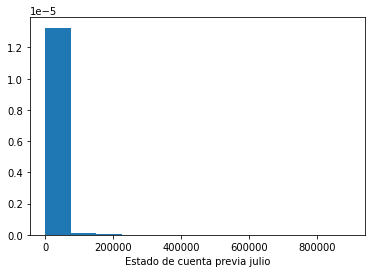

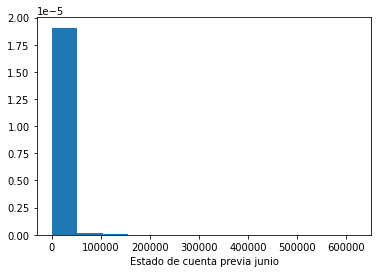

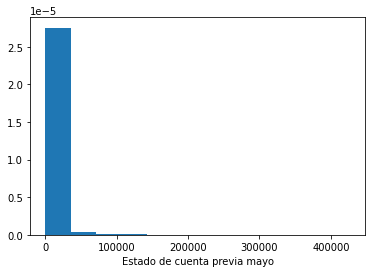

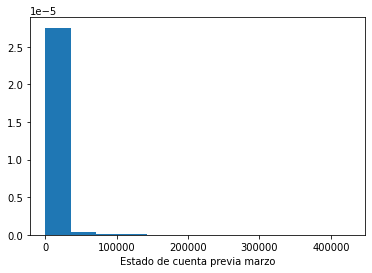

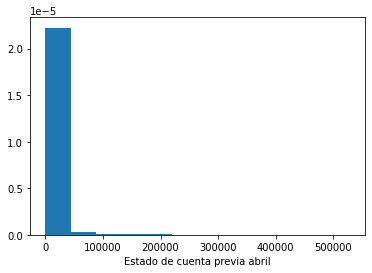

In [ ]:

plt.hist(df["X1"], bins=12, density=True)
plt.xlabel("Cantidad de credito otorgado")
plt.ylabel("")
plt.show()

plt.hist(df["X5"], bins=12, density=True)
plt.xlabel("Edad")
plt.ylabel("")
plt.show()

plt.hist(df["X12"], bins=12, density=True)
plt.xlabel("Estado de cuenta septiembre")
plt.ylabel("")
plt.show()


plt.hist(df["X13"], bins=12, density=True)
plt.xlabel("Estado de cuenta agosto")
plt.ylabel("")
plt.show()

plt.hist(df["X14"], bins=12, density=True)
plt.xlabel("Estado de cuenta julio")
plt.ylabel("")
plt.show()
plt.hist(df["X15"], bins=12, density=True)
plt.xlabel("Estado de cuenta junio")
plt.ylabel("")
plt.show()

plt.hist(df["X16"], bins=12, density=True)
plt.xlabel("Estado de cuenta mayo")
plt.ylabel("")
plt.show()

plt.hist(df["X17"], bins=12, density=True)
plt.xlabel("Estado de cuenta marzo")
plt.ylabel("")
plt.show()

plt.hist(df["X18"], bins=12, density=True)
plt.xlabel("Estado de cuenta previa septiembre")
plt.ylabel("")
plt.show()

plt.hist(df["X19"], bins=12, density=True)
plt.xlabel("Estado de cuenta previa agosto")
plt.ylabel("")
plt.show()

plt.hist(df["X20"], bins=12, density=True)
plt.xlabel("Estado de cuenta previa julio")
plt.ylabel("")
plt.show()

plt.hist(df["X21"], bins=12, density=True)
plt.xlabel("Estado de cuenta previa junio")
plt.ylabel("")
plt.show()

plt.hist(df["X22"], bins=12, density=True)
plt.xlabel("Estado de cuenta previa mayo")
plt.ylabel("")
plt.show()

plt.hist(df["X22"], bins=12, density=True)
plt.xlabel("Estado de cuenta previa marzo")
plt.ylabel("")
plt.show()

plt.hist(df["X23"], bins=12, density=True)
plt.xlabel("Estado de cuenta previa abril")
plt.ylabel("")
plt.show()

# 9.Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

PIECHART

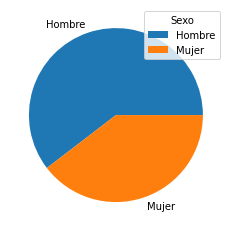

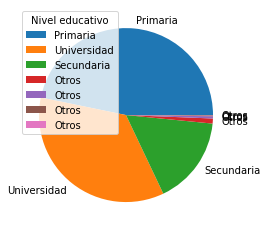

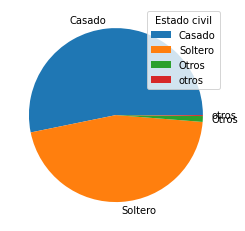

In [ ]:
l1= ["Hombre","Mujer"]
plt.pie(df.value_counts(['X2']),labels = l1)
plt.legend(title = "Sexo")
plt.show()

l2=["Primaria", "Universidad","Secundaria","Otros","Otros","Otros","Otros"]
plt.pie(df.value_counts(['X3']), labels = l2)
plt.legend(title= "Nivel educativo")
plt.show()

l3=["Casado","Soltero","Otros","otros"]
plt.pie(df.value_counts(['X4']), labels = l3)
plt.legend(title= "Estado civil")
plt.show()

SCATTER PLOT

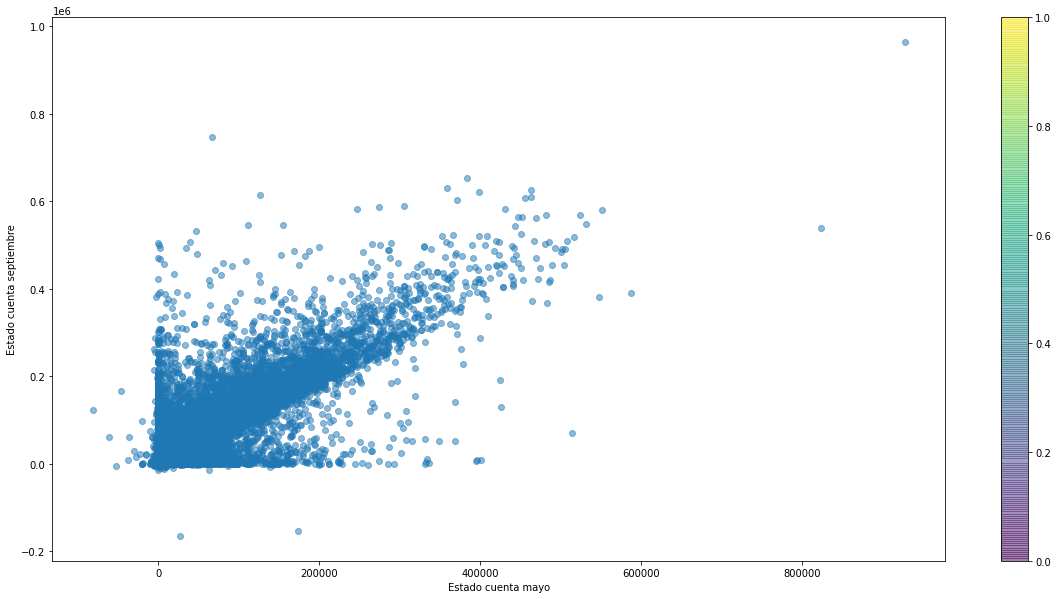

In [ ]:
plt.figure(figsize=(20, 10))

plt.scatter(df["X16"], df["X12"], alpha=0.5)
plt.xlabel("Estado cuenta mayo")
plt.ylabel("Estado cuenta septiembre")
plt.colorbar()
plt.show()

HEATMAP


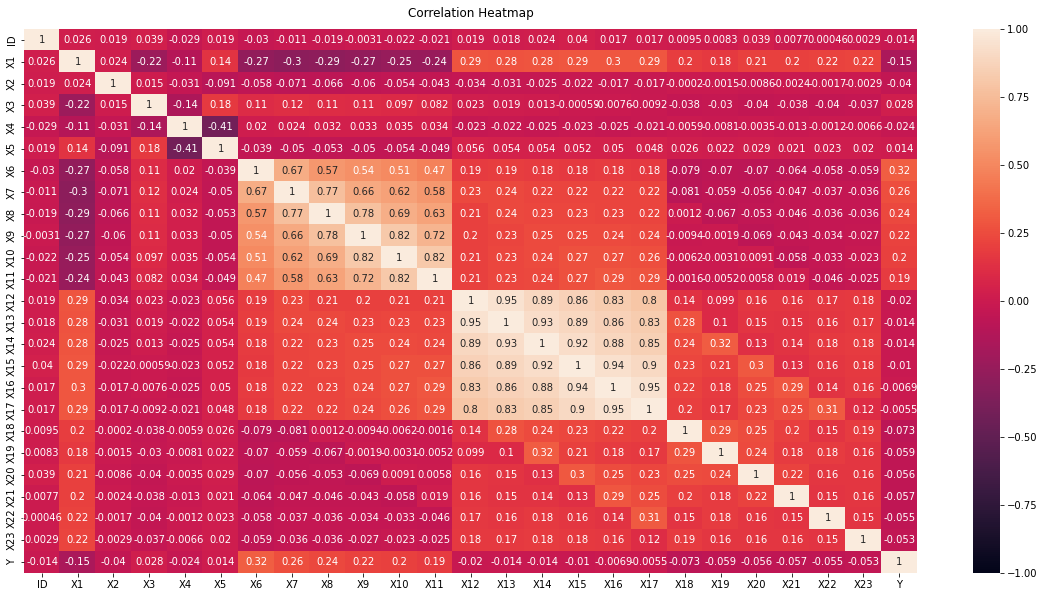

In [ ]:


plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


# 10.Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.
1. PIECHART :Esta nos permite visualizar como estan distribuidas las variables categoricas en donde nos permite mas adelante tomar deciciones , en este caso a los hombres se les dio mas credito, la mayoria de las personas que pidieron el credito tienen un nivel educativo de primaria ymas personas casado utilizaron el credito esto nos prmite identificar nicho para la toma de deciciones.
2. SCATTER PLOT :Esta nos permite visualizar la correlacion entre 2 variables  en la que mas adelante podremos utilizar para realizar modelos de machine learning, en la imagen muestra una alta correlacion positiva
3. HEATMAP :Esta nos permite visualizar la correlacion entre todas las variables de el data frame  , nos brinda una grafica amigable en la que nos permite identificar  por medio de colores cuales son las variables mas correlacinadas